# Netflix Data Analysis

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
path ="/content/drive/MyDrive/Csv /netflix_titles.csv"
dataset = pd.read_csv(path)

In [40]:
dataset = pd.read_csv(path)
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [59]:
print("Shape : ",dataset.shape)

Shape :  (8807, 12)


In [60]:
print(" Data types for each attributes ")
print(dataset.dtypes)

 Data types for each attributes 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [61]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [62]:
dataset.groupby('type').size()

type
Movie      6131
TV Show    2676
dtype: int64

In [64]:

dataset.loc[:,["country"]]

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [65]:
Country = dataset.country.value_counts(sort=True)
Country

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [66]:
dataset.iloc[10:25][['title','description']]

,title,description
10,"Vendetta: Truth, Lies and The Mafia","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,Bangkok Breaking,"Struggling to earn a living in Bangkok, a man ..."
12,Je Suis Karl,After most of her family is murdered in a terr...
13,Confessions of an Invisible Girl,When the clever but socially-awkward Tetê join...
14,Crime Stories: India Detectives,Cameras following Bengaluru police on the job ...
15,Dear White People,Students of color navigate the daily slights a...
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,Declassified documents reveal the post-WWII li...
17,Falsa identidad,Strangers Diego and Isabel flee their home in ...
18,Intrusion,After a deadly home invasion at a couple’s new...
19,Jaguar,"In the 1960s, a Holocaust survivor joins a gro..."


In [67]:
dataset[(dataset['release_year'] >= 2019) & (dataset['release_year'] <= 2020) & (dataset['rating']== 'TV-MA')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",NaN,"September 16, 2021",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Five glamorous millennials strive for success ...
84,s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,"September 10, 2021",2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
...,...,...,...,...,...,...,...,...,...,...,...,...
8319,s8320,Movie,The Ghost Who Walks,Cody Stokes,"Garland Scott, Frank Mosley, Alexia Rasmussen,...",United States,"April 7, 2020",2019,TV-MA,107 min,"Dramas, Independent Movies, Thrillers","Desperate to meet his daughter, a convict cuts..."
8516,s8517,Movie,The Spy Who Fell to Earth,Thomas Meadmore,NaN,United Kingdom,"April 5, 2019",2019,TV-MA,94 min,"Documentaries, International Movies","Based on Dr. Ahron Bregman's book, this docume..."
8631,s8632,Movie,Trixie Mattel: Moving Parts,Nicholas Zeig-Owens,Brian Firkus,United States,"March 27, 2020",2019,TV-MA,91 min,"Documentaries, Music & Musicals",Drag queen Trixie Mattel deals with the bitter...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


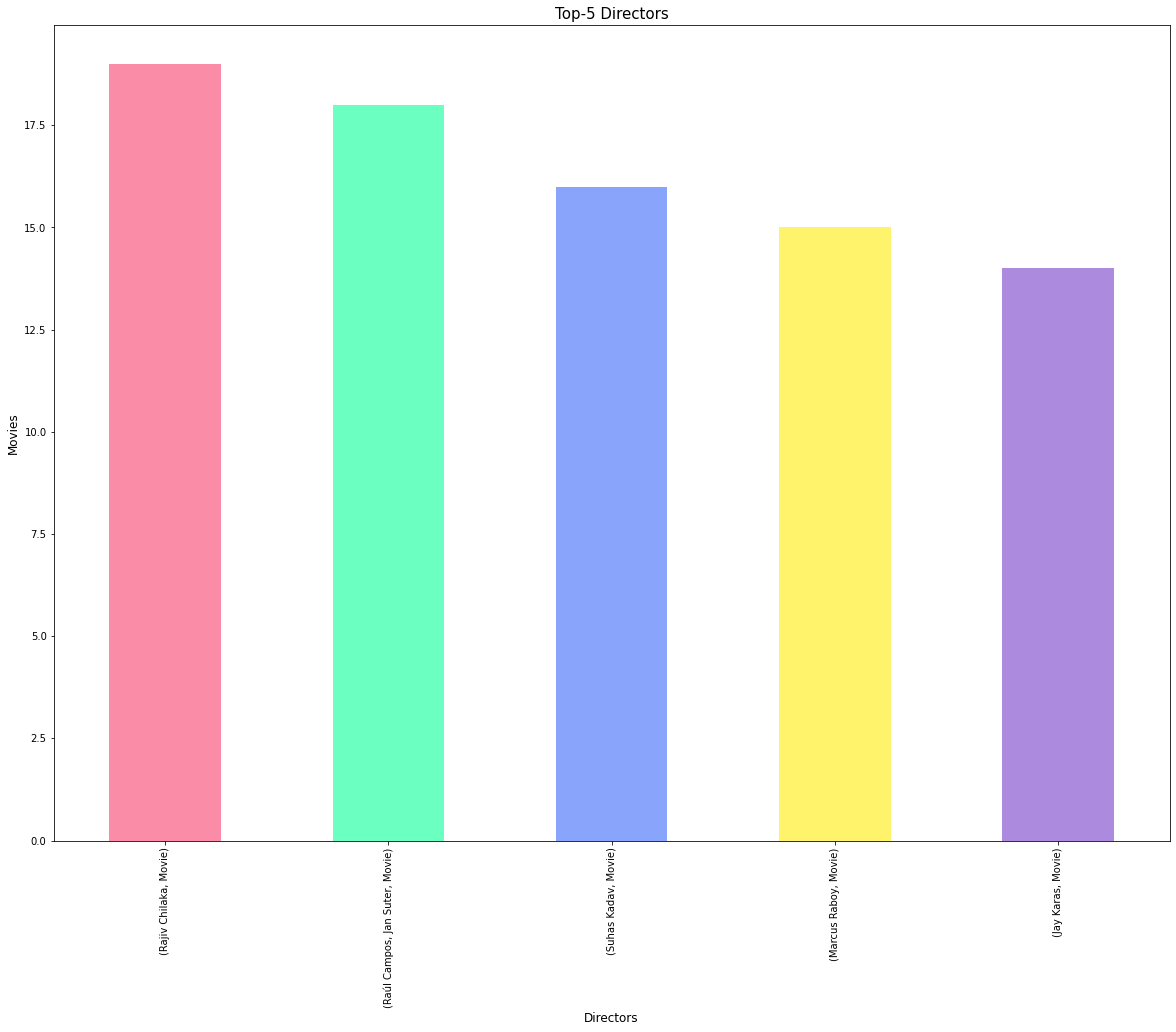

In [74]:
grp=dataset.groupby(['director','type'])['type'].count()
director=grp.sort_values(ascending=False).head(5)
director
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
ax=plt.axes()
director.plot.bar(color=['#fb6f92','#46ffb2','#6C8DFA','#fff146','#976ED7'],alpha=0.8)
plt.ylabel("Movies",size=12)
plt.xlabel("Directors",size=12)
plt.title("Top-5 Directors",size=15)
plt.show()

In [36]:
dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0])
dataset['cast'].replace(np.nan,'',inplace=True)
dataset['director'].replace(np.nan,'',inplace=True)
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset['date_added'] = pd.to_datetime(dataset['date_added'])
dataset['month_added'] = dataset['date_added'].dt.month
dataset['month_name_added'] = dataset['date_added'].dt.month_name()
dataset['year_added'] = dataset['date_added'].dt.year

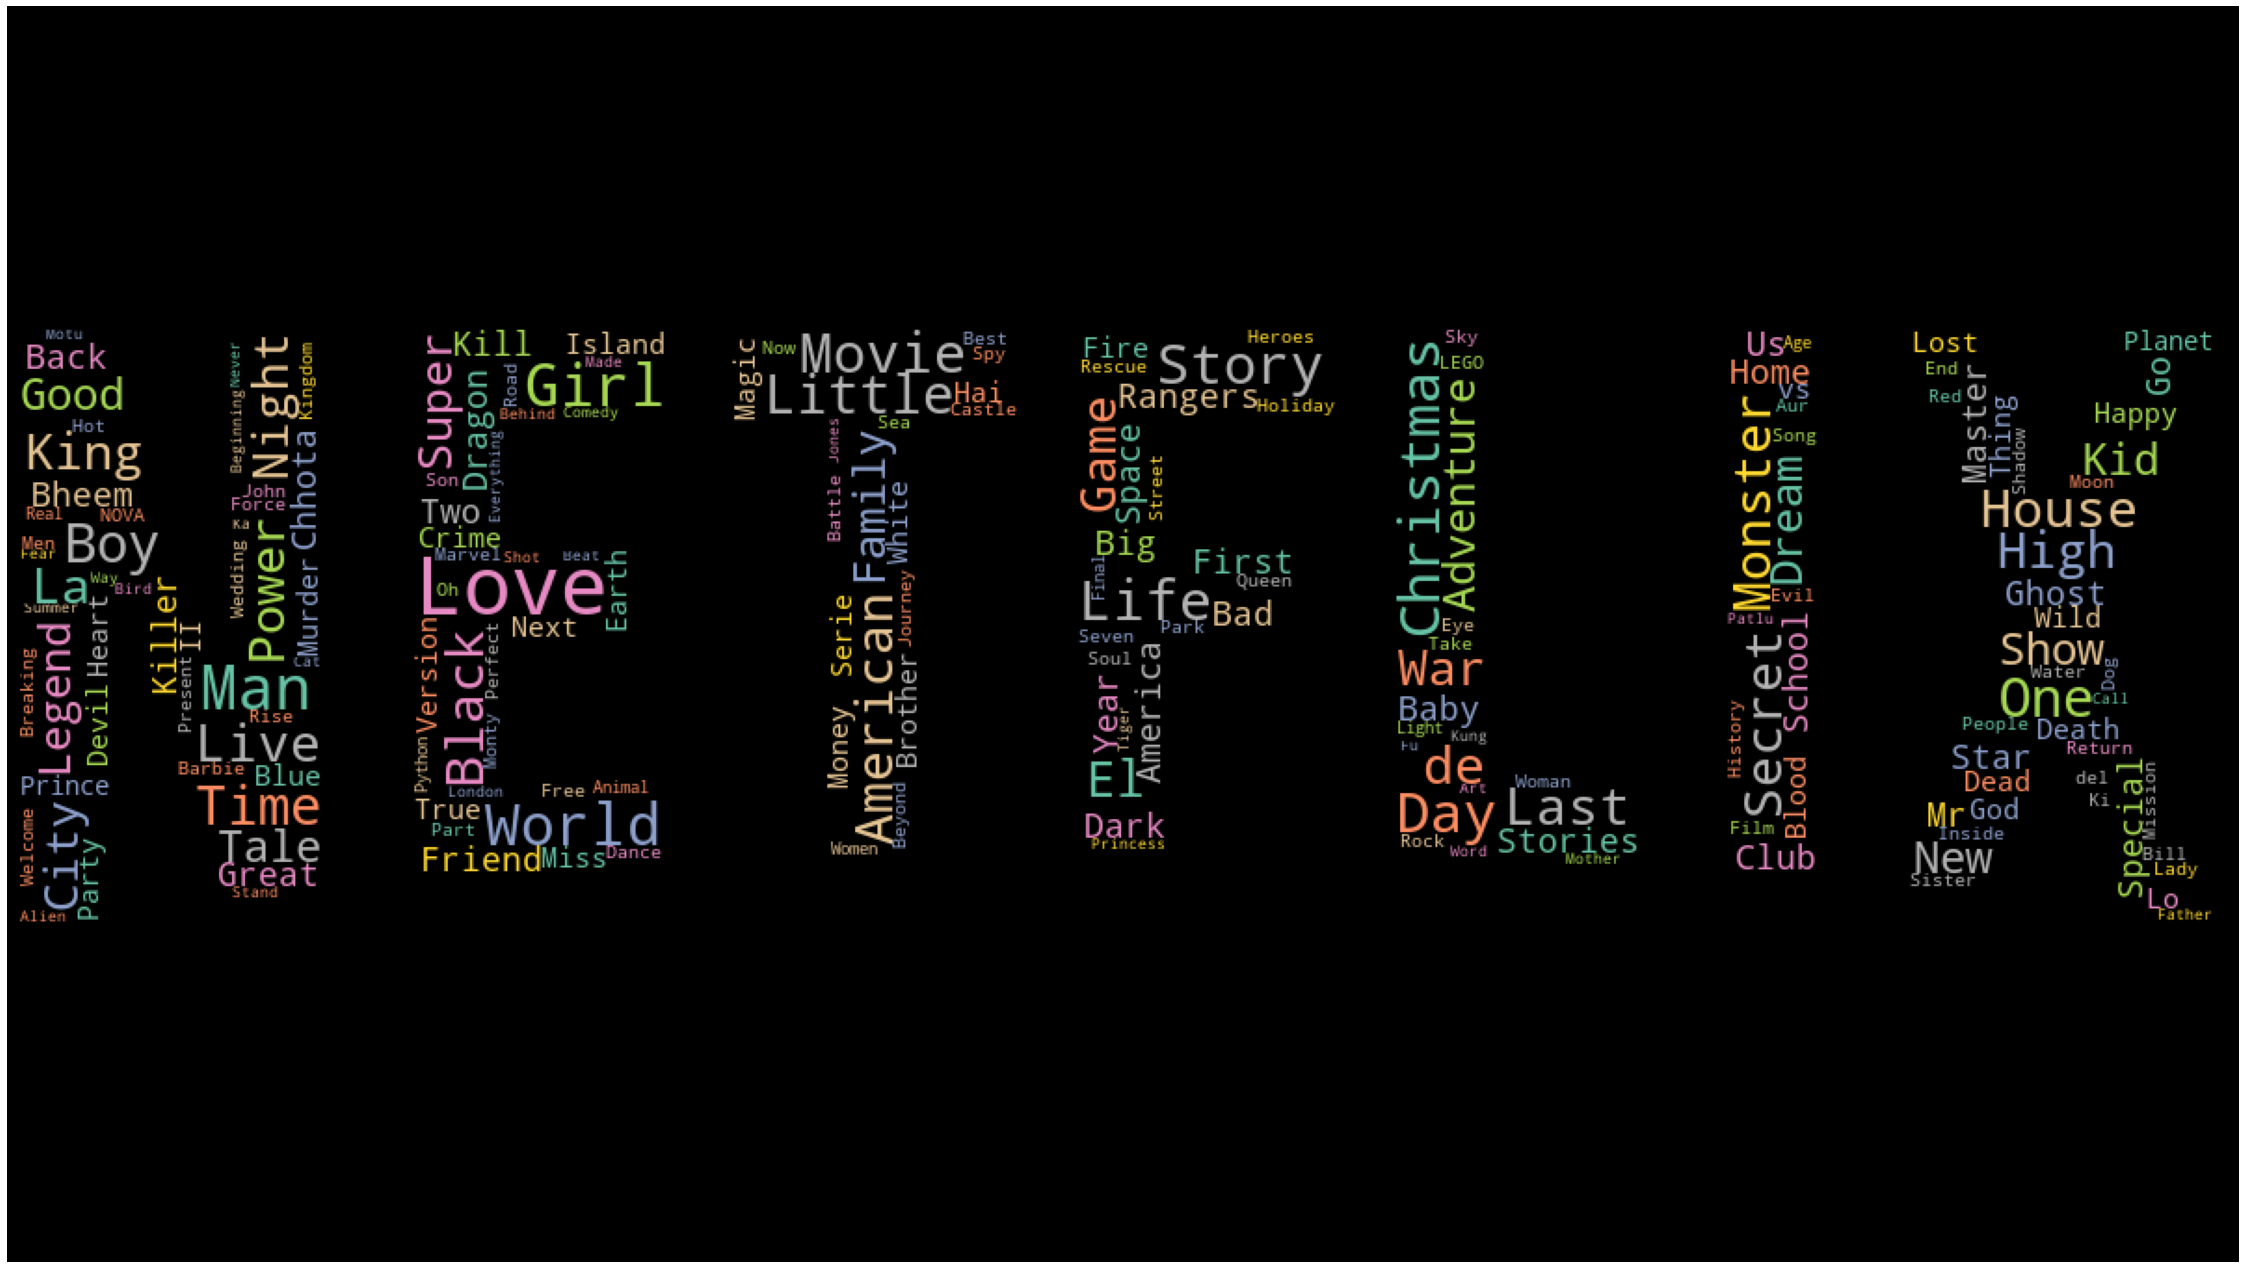

In [38]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

mask = np.array(Image.open("/content/drive/MyDrive/Csv /netflix-logo-1-1200x675.png"))

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate(' '.join(dataset['title']))

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
plot_cloud(wordcloud)

In [ ]:
z = dataset.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

In [ ]:
x = dataset.groupby(['type'])['type'].count()
y = len(dataset)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T

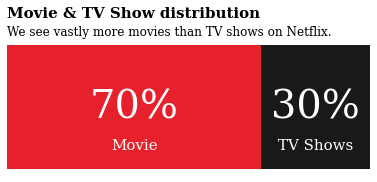

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#e50914', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='black', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()

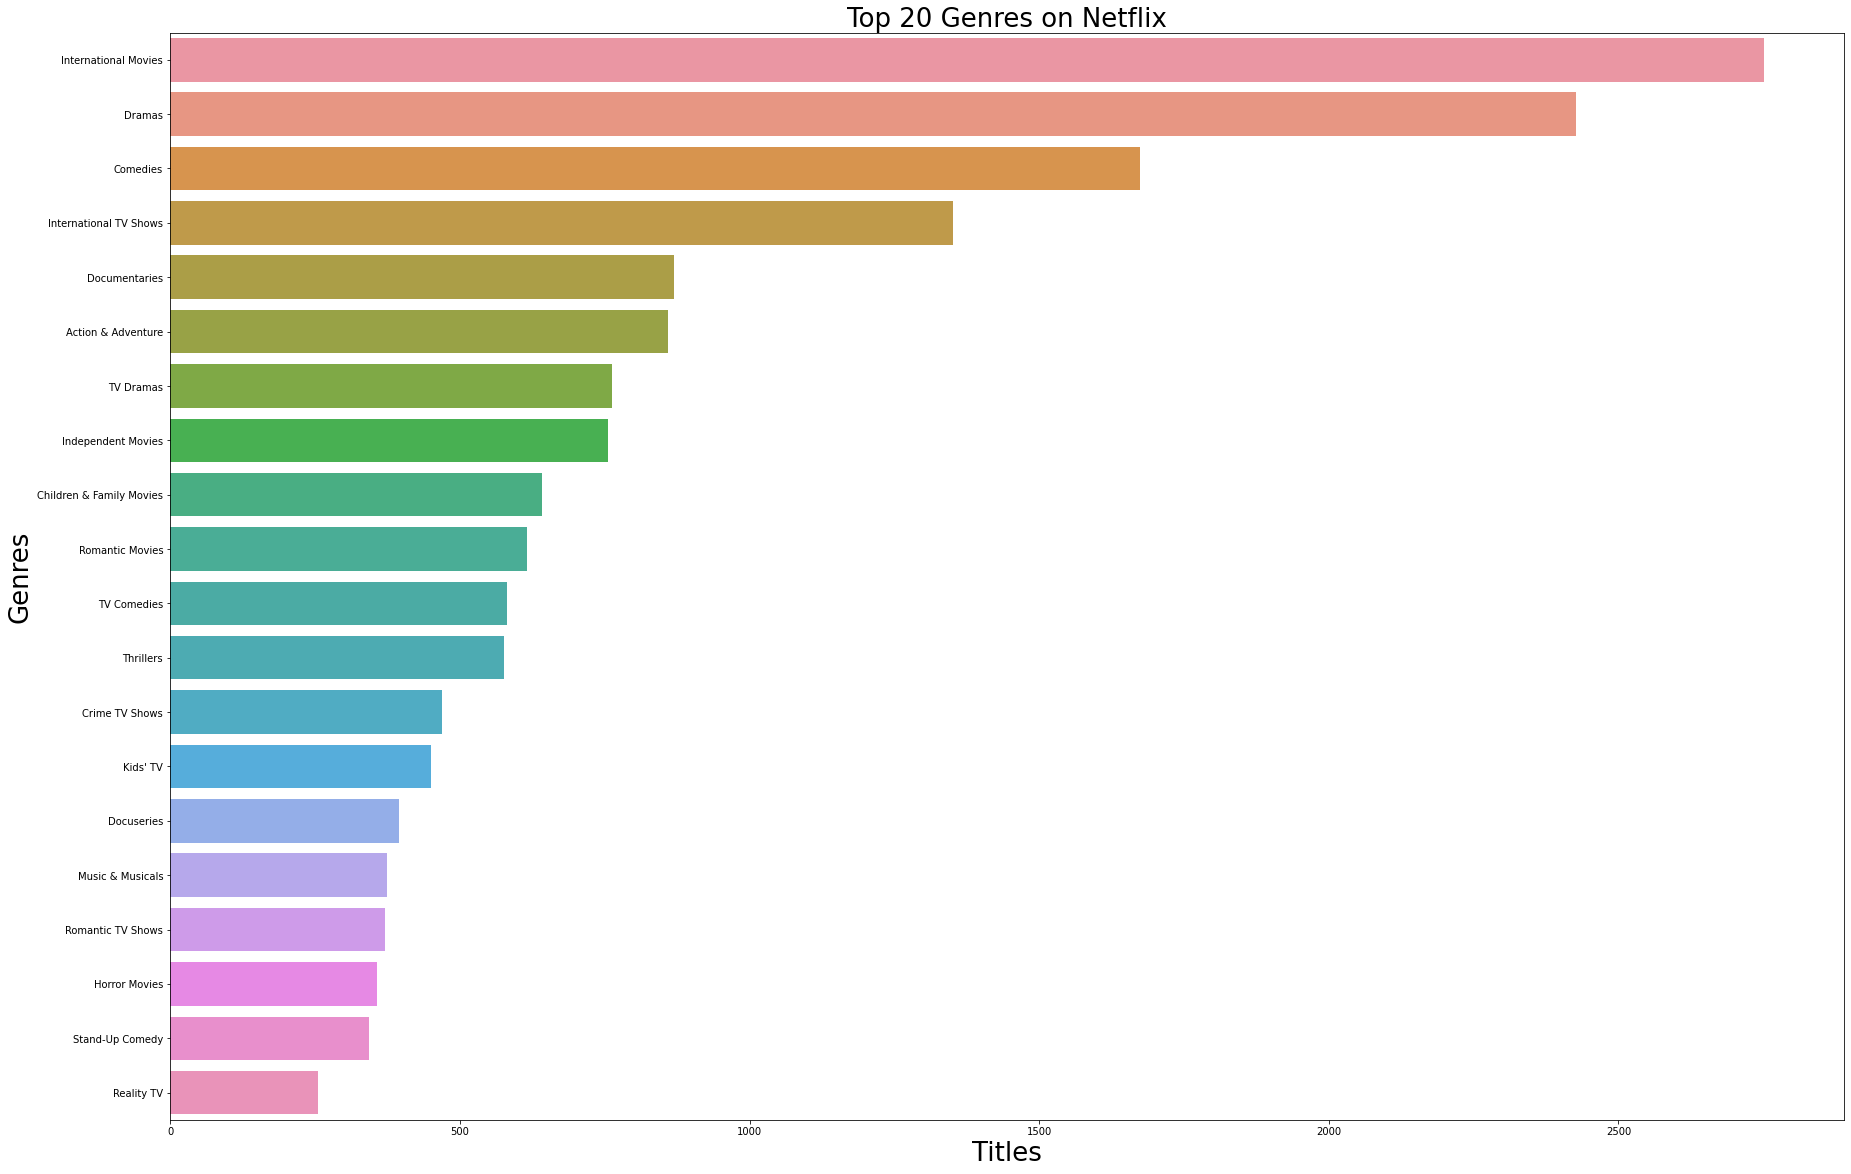

In [68]:
filtered_genres = dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(30,20))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',fontsize=26)
plt.xlabel('Titles',fontsize=26)
plt.ylabel('Genres',fontsize=26)
plt.show()

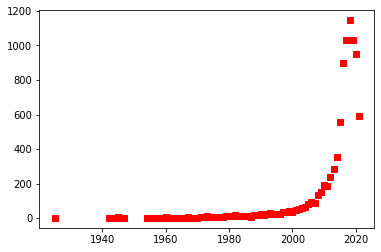

In [ ]:
year_trend = dataset.release_year.value_counts(sort=True)
plt.plot(year_trend,'rs');

In [ ]:
listed_in_most_common = dataset.listed_in.value_counts(sort=True).head(10)
listed_in_most_common

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

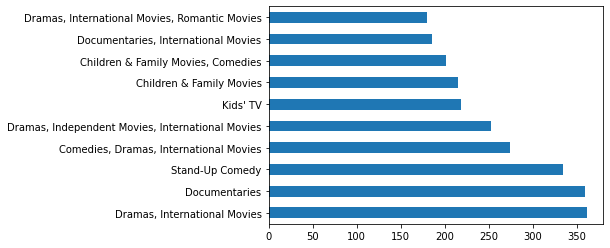

In [ ]:
dataset['listed_in'].value_counts(sort=True).head(10).plot(kind='barh',)

In [ ]:

s=input ("ENTER THE GENRE YOU WANT TO WATCH : ")
if(s== "Thrillers"):
    Thrillers = dataset['listed_in'] == 'Thrillers'
    print(dataset[Thrillers].describe())
elif(s=="Comedies"):
    Comedies = dataset['listed_in'] == 'Comedies'
    print(dataset[Comedies].describe())
elif(s== "Dramas" ):
    Dramas = dataset['listed_in'] == 'Dramas'
    print(dataset[Dramas].describe())
else: 
    print ("Ente a valid name")

ENTER THE GENRE YOU WANT TO WATCH : Dramas
       release_year  month_added   year_added
count    137.000000   137.000000   137.000000
mean    2012.175182     6.664234  2018.751825
std        9.674784     3.652713     2.381859
min     1980.000000     1.000000  2011.000000
25%     2010.000000     4.000000  2018.000000
50%     2016.000000     7.000000  2019.000000
75%     2019.000000    10.000000  2020.000000
max     2021.000000    12.000000  2021.000000
